# Knapsack problem

The knapsack (KP) problem is an example of a combinatorial optimization problem, refer to the [wiki](https://en.wikipedia.org/wiki/Knapsack_problem) for a broader overview. 

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/250px-Knapsack.svg.png" width="200"></center>

It is concerned with a knapsack that has positive integer volume (or capacity) $V$. For instance, the knapsack may be able to store 20 cubic inches. There are $N$ distinct items that may potentially be placed in the knapsack. Item $i$ has a positive integer
volume $Vi$ (e.g this object is 8 cubic inches) and positive integer benefit $Bi$ (e.g how benefical is it to have this object in the knapsack). In the most basic form of the problem we will consider there are only one of each item available (0-1 KP).

The goal is to maximize benefit:

$$
\sum_i^N B_i
$$

Subject to the constraint that:

$$
\big ( \sum_i^N V_i \big) \leq  V
$$



In [ ]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

In [ ]:
max_volume = 100
benefits = np.zeros(40)
benefits =  np.array([int(rand.randint(0,10)+i) for i in benefits])# generate the benefits for the torunament
volumes = np.zeros(40)
volumes = np.array([int(rand.randint(0,10)+i) for i in volumes])# generate the volumes for the tournaments
print(benefits)
print(volumes)

[ 1  0 10  8 10  9  8 10  7  7  9 10  3  8  0  6  2  0  9  1  5  3  2  6
  8  0  6  5  1  1  8  9  8  8  5  8 10  9  3 10]
[ 5  4  3 10  5  4  9 10  6  3  8  6  3  8  9  6  0  5  6  5  8  0  5  1
  6  3  8  2  7  6  7  5  8  4  2  4  3  2  0  5]


In [ ]:
import numpy as np
import random as rand
from scipy import stats
def fitness_function_w(genotype,max_volume=150):#The fitness function
  #get the total benefits of the genotype
  benefit =sum(genotype * benefits)
  #get total volume of the genotype
  total_vol =sum(genotype * volumes)
  #check if the volume in the genotype surpasses max vol
  if total_vol > max_volume:
    return 0
    
  else:# a single number saying how good the geneotype is
    return benefit

def getsd(arrofarr):#gets the standard error of an array 
  maxarr=[]
  for i in arrofarr:
    maxarr.append(max(i))
  return  stats.sem(maxarr)

def getlargestarr(arrofarr):#gets the array out of a set of arrays
  maxarr=[]
  for i in arrofarr:
    maxarr.append(max(i))
  return maxarr.index(max(maxarr))

def getindexofmaxfit(genotypes):#gets the index of the individula with the largest fitness
  fitnesses = []
  for i in genotypes:
    fitnesses.append(fitness_function_w(i))
     
  return fitnesses.index(max(fitnesses))
 

def getmaxfitness(genotypes):#gets the largest fitness in a population
  fitnesses = []
  for i in genotypes:
    fitnesses.append(fitness_function_w(i))

  return(max(fitnesses))

def getfitness(genotypes):#returns a function with all the fitnesses
  fitnesses = []
  for i in genotypes:
    fitnesses.append(fitness_function_w(i))

  return fitnesses


def mutation(genotype,mutation_rate):#Mutates a geneotype
  for i in range(len(genotype)):#loops through the genotype
    if mutation_rate > np.random.random():#checks if mutation rate is larger than the random number generated
      if genotype[i] == 1:#flips the binary digit
        genotype[i] = 0
      else:
        genotype[i] = 1

def local_neighbour(neighbourhood_size,index,populationsize):#gets a random index in an index's local neighbourhood
  k = index + neighbourhood_size
  if k > populationsize:
    local_neighbour_idx = k - populationsize # allows for a wrap-around function so that the local neighbourhood is circular
  else:
    local_neighbour_idx = np.random.randint(index+1, index + neighbourhood_size) # pick random neighbour 
  return local_neighbour_idx


def Pcrossover(Wgenotype,Lgenotype,crossover_prob ):#crosses over a loser with a winner
  for i in range(len(Lgenotype)):#loops through the losers genotype
    if crossover_prob > np.random.random():#checks if crossover prob is greater than the random number generated
      Lgenotype[i] = Wgenotype[i]#sets the digit of the losers index to the digit of the winners index
  



# lets say I want to sample a neighbour for indivudal 3


#print(local_neighbour_gene)
def runTournament(neighbourhood,crossover_prob,tournamentruns,mutation_rate,genotypes):#a function that runs the tournament and sets the parameters for that tournament
  results=[]
  allfitnesses=[]
  best_individual = getindexofmaxfit(genotypes) 
  #b_i_score= []
  for i in range(tournamentruns):
    #get the fitnesses of all the genotypes
    fitnesses = getfitness(genotypes)
    allfitnesses.append(fitnesses)
    #get the index of a random genotype and get a local neighbour of that genotype
    index1 = np.random.randint(0,len(genotypes)-1)
    index2 = local_neighbour(neighbourhood,index1,len(genotypes))
    #define a loser and winner - crossover and mutate the loser
    if fitness_function_w(genotypes[index1]) <= fitness_function_w(genotypes[index2]):
      Pcrossover(genotypes[index2],genotypes[index1],crossover_prob)
      mutation(genotypes[index1],mutation_rate)
    #define a loser and winner - crossover and mutate the loser
    elif fitness_function_w(genotypes[index2]) < fitness_function_w(genotypes[index1]):
      Pcrossover(genotypes[index1],genotypes[index2],crossover_prob)
      mutation(genotypes[index2],mutation_rate)
    #append the largest fitness of the run on to the results array
    results.append(getmaxfitness(genotypes))
    #b_i_score.append(fitness_function_w(genotypes[best_individual]))
    
  return results

#How population size affects function


population size: fitness standard deviation 0.7520342781785652
population size: fitness standard deviation 1.0
population size: fitness standard deviation 1.3266499161421597
population size: fitness standard deviation 1.174260996920569
population size: fitness standard deviation 0.9574271077563381


Text(0, 0.5, 'Max Fitness')

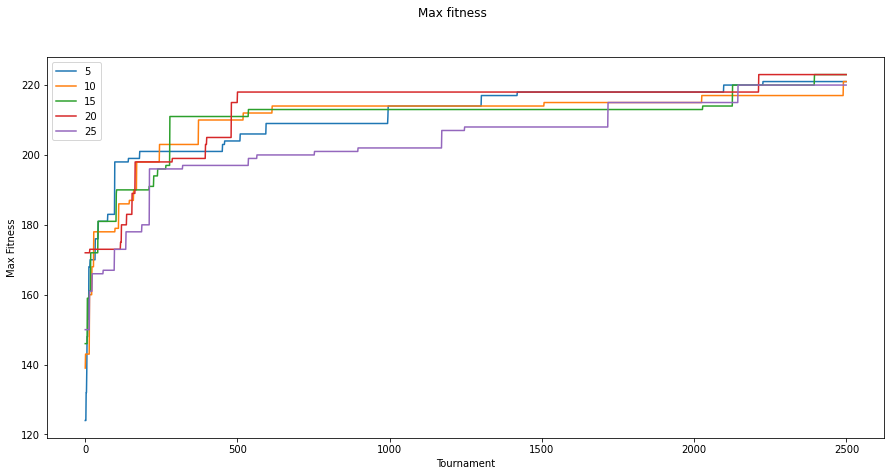

In [ ]:
#getfitness(runTournament(100,0.5,500,0.7))
averages={}
num_genes = 40
size = plt.figure(figsize= (15,7))
size.suptitle("Max fitness")
for step in range(5,26,5):
  results = []
  genotypes = np.random.choice([0, 1], (step, num_genes))
  for i in range(10):
    results.append(runTournament(int(step/2),0.9,2500,0.1,np.copy(genotypes)))
  res_largest= getlargestarr(results)
  plt.plot(results[res_largest],label = step)
  #std.append(getsd(results))
  print("population size: fitness standard deviation "+  str(getsd(results)))
  plt.legend()

plt.xlabel("Tournament")
plt.ylabel("Max Fitness")


#How mutation rate affects fitness

In [ ]:

num_individuals= 15
num_genes = 40
genotypes = np.random.choice([0, 1], (num_individuals, num_genes))
size = plt.figure(figsize= (15,7))
size.suptitle("How mutation rate affects population ")
for step in range(1,11,1):
  results =[]
  b_i_score = []
  best_individual_score= []
  for i in range(10):
    n = float(step)/10
    results.append(runTournament(3,0.6,2500,n,np.copy(genotypes)))
  res_largest= getlargestarr(results)
  plt.plot(results[res_largest], label = n)
  #std.append(getsd(results))
  print("Mutation Rate : fitness standard deviation "+  str(getsd(results)))
  plt.legend()

plt.xlabel("Tournament Runs")
plt.ylabel("Max Fitness")


#How Crossover Probabaility affects Fitness

In [ ]:
num_individuals= 15
num_genes = 40
genotypes = np.random.choice([0, 1], (num_individuals, num_genes))
size = plt.figure(figsize= (15,7))
size.suptitle("How Crossover Probabaility affects population ")
for step in range(1,11,1):
  results =[]
  best_individual = getindexofmaxfit(genotypes)
  for i in range(10):
    n = float(step)/10
    results.append(runTournament(3,n,2500,0.1,np.copy(genotypes)))
  res_largest= getlargestarr(results)
  plt.plot(results[res_largest],label = n)
  #std.append(getsd(results))
  print("Crossover Probability : fitness standard deviation "+  str(getsd(results)))
  plt.legend()

plt.xlabel("Tournament Runs")
plt.ylabel("Max Fitness")


#How neighbourhood affects Fitness

In [ ]:
num_individuals= 15
num_genes = 40
genotypes = np.random.choice([0, 1], (num_individuals, num_genes))
size = plt.figure(figsize= (15,7))
size.suptitle("How Neighbourhood affects Fitness on a population of 25 ")
for step in range(4,20,4):
  results =[]
  for i in range(10):
    results.append(runTournament(3,0.6,2500,0.1,np.copy(genotypes)))
  res_largest= getlargestarr(results)
  plt.plot(results[res_largest], label= step)
  #std.append(getsd(results))
  print("neighbourhoods : fitness standard deviation "+  str(getsd(results)))
  plt.legend()

plt.xlabel("Tournament Runs")
plt.ylabel("Max Fitness")
#print("number of neighbourhoods : fitness"+str(neaverages))
  
plt.show()

#How tournaments runs affects Fitness

standard deviation: 2.1602468994692865
standard deviation: 1.149395976637778
standard deviation: 1.8844392033470094
standard deviation: 0.9451631252505217
standard deviation: 0.8975274678557505
standard deviation: 0.9073771725877465
max fitness: [206, 210, 203, 208, 210, 209]
mean fitness: [187.4872, 197.2709, 202.6328, 202.95565, 205.09616, 206.905]


<Figure size 1080x504 with 0 Axes>

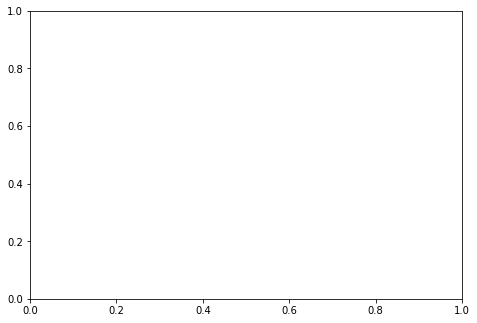

In [ ]:
#change graph to bar graph of tournament runs against fitness
import numpy as np
num_individuals= 15
num_genes = 40
genotypes = np.random.choice([0, 1], (num_individuals, num_genes))
size = plt.figure(figsize= (15,7))
size.suptitle("How Tournaments runs Fitness on a population of 25 ")
tournamentruns = ['500', '1000', '1500', '2000', '2500','3000']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
barval=[]
mean=[]

for step in range(500,3001,500):
  results =[]
  for i in range(10):
    results.append(runTournament(3,0.6,step,0.1,np.copy(genotypes)))
 
  barval.append(max(max(results)))
  mean.append(np.mean(results))
  print("standard deviation: "+str(getsd(results)))

print("max fitness: "+str(barval))
print("mean fitness: "+str(mean))

